# Introduction

Hopefully, this short tutorial can show you a lot of different commands that will help you gain the most insights into your dataset. 

In [3]:
import pandas as pd
import sys
sys.path.append("../")
from src.utils import load_data_from_google_drive

# Loading in Data

The first step in any ML problem is identifying what format your data is in, and then loading it into whatever framework you're using. For Kaggle compeitions, a lot of data can be found in CSV files, so that's the example we're going to use. 

We're going to be looking at a sports dataset that shows the results from NCAA basketball games from 1985 to 2016. This dataset is in a CSV file, and the function we're going to use to read in the file is called **pd.read_csv()**. This function returns a **dataframe** variable. The dataframe is the golden jewel data structure for Pandas. It is defined as "a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)".

Just think of it as a table for now. 

In [4]:
df = load_data_from_google_drive(url='https://drive.google.com/file/d/184JcLbSpArA_uq0DgAv2k892KChJVPHt/view?usp=share_link')

In [5]:
df

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
145284,2016,132,1114,70,1419,50,N,0
145285,2016,132,1163,72,1272,58,N,0
145286,2016,132,1246,82,1401,77,N,1
145287,2016,132,1277,66,1345,62,N,0


# The Basics

Now that we have our dataframe in our variable df, let's look at what it contains. We can use the function **head()** to see the first couple rows of the dataframe (or the function **tail()** to see the last few rows).

In [6]:
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [7]:
df.tail()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
145284,2016,132,1114,70,1419,50,N,0
145285,2016,132,1163,72,1272,58,N,0
145286,2016,132,1246,82,1401,77,N,1
145287,2016,132,1277,66,1345,62,N,0
145288,2016,132,1386,87,1433,74,N,0


We can see the dimensions of the dataframe using the the **shape** attribute

In [8]:
df.shape

(145289, 8)

We can also extract all the column names as a list, by using the **columns** attribute and can extract the rows with the **index** attribute

In [9]:
df.columns.tolist()

['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Wloc', 'Numot']

In order to get a better idea of the type of data that we are dealing with, we can call the **describe()** function to see statistics like mean, min, etc about each column of the dataset. 

In [10]:
df.describe()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot
count,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000
mean,2001.574834,75.223816,1286.720646,76.600321,1282.864064,64.497009,0.044387
std,9.233342,33.287418,104.570275,12.173033,104.829234,11.380625,0.247819
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1994.000000,47.000000,1198.000000,68.000000,1191.000000,57.000000,0.000000
50%,2002.000000,78.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2010.000000,103.000000,1379.000000,84.000000,1375.000000,72.000000,0.000000
max,2016.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


Okay, so now let's looking at information that we want to extract from the dataframe. Let's say I wanted to know the max value of a certain column. The function **max()** will show you the maximum values of all columns

In [11]:
df.max()

Season    2016
Daynum     132
Wteam     1464
Wscore     186
Lteam     1464
Lscore     150
Wloc         N
Numot        6
dtype: object

Then, if you'd like to specifically get the max value for a particular column, you pass in the name of the column using the bracket indexing operator

In [12]:
df['Wscore'].max()

186

If you'd like to find the mean of the Losing teams' score. 

In [13]:
df['Lscore'].mean()

64.49700940883343

But what if that's not enough? Let's say we want to actually see the game(row) where this max score happened. We can call the **argmax()** function to identify the row index

In [14]:
df['Wscore'].argmax()

24970

One of the most useful functions that you can call on certain columns in a dataframe is the **value_counts()** function. It shows how many times each item appears in the column. This particular command shows the number of games in each season

In [15]:
df['Season'].value_counts()

Season
2016    5369
2014    5362
2015    5354
2013    5320
2010    5263
2012    5253
2009    5249
2011    5246
2008    5163
2007    5043
2006    4757
2005    4675
2003    4616
2004    4571
2002    4555
2000    4519
2001    4467
1999    4222
1998    4167
1997    4155
1992    4127
1991    4123
1996    4122
1995    4077
1994    4060
1990    4045
1989    4037
1993    3982
1988    3955
1987    3915
1986    3783
1985    3737
Name: count, dtype: int64

**Q**: How many unique seasons are there in the dataset? Use the nunique() function.

In [16]:
# Write your code here
df['Season'].nunique()

32

**Q**: Find the team with the most wins. Use the value_counts() function on the Wteam column.

In [17]:
# Write your code here
df['Wteam'].value_counts().idxmax()

1181

# Acessing Values

Then, in order to get attributes about the game, we need to use the **iloc[]** function. Iloc is definitely one of the more important functions. The main idea is that you want to use it whenever you have the integer index of a certain row that you want to access. As per Pandas documentation, iloc is an "integer-location based indexing for selection by position."

In [18]:
df.iloc[[df['Wscore'].argmax()]]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
24970,1991,68,1258,186,1109,140,H,0


Let's take this a step further. Let's say you want to know the game with the highest scoring winning team (this is what we just calculated), but you then want to know how many points the losing team scored. 

In [19]:
df.iloc[[df['Wscore'].argmax()]]['Lscore']
# Access the index based on maximum winning score, then access the value from Lscore (losing team score)

24970    140
Name: Lscore, dtype: int64

When you see data displayed in the above format, you're dealing with a Pandas **Series** object, not a dataframe object.

### Student's notes:
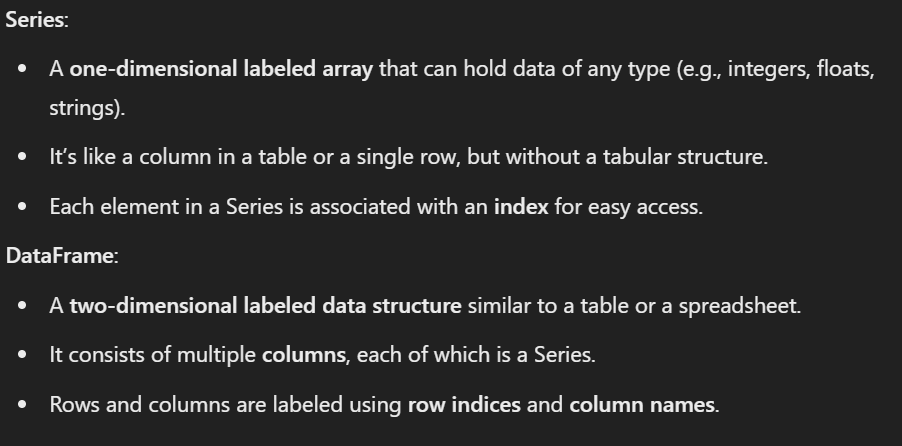

In [20]:
type(df.iloc[[df['Wscore'].argmax()]]['Lscore'])

pandas.core.series.Series

In [21]:
type(df.iloc[[df['Wscore'].argmax()]])

pandas.core.frame.DataFrame

The following is a summary of the 3 data structures in Pandas (Haven't ever really used Panels yet)

![](DataStructures.png)

When you want to access values in a Series, you'll want to just treat the Series like a Python dictionary, so you'd access the value according to its key (which is normally an integer index)

In [22]:
df.iloc[[df['Wscore'].argmax()]]['Lscore'][24970]

140

The other really important function in Pandas is the **loc** function. Contrary to iloc, which is an integer based indexing, loc is a "Purely label-location based indexer for selection by label". Since all the games are ordered from 0 to 145288, iloc and loc are going to be pretty interchangable in this type of dataset

In [23]:
df.iloc[2:10]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
5,1985,25,1218,79,1337,78,H,0
6,1985,25,1228,64,1226,44,N,0
7,1985,25,1242,58,1268,56,N,0
8,1985,25,1260,98,1133,80,H,0
9,1985,25,1305,97,1424,89,H,0


In [24]:
df.loc[2:3]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0


Notice the slight difference in that iloc is exclusive of the second number, while loc is inclusive. 

Below is an example of how you can use loc to acheive the same task as we did previously with iloc

In [25]:
df.loc[df['Wscore'].argmax(), 'Lscore']

# Versus the previous:
df.iloc[[df['Wscore'].argmax()]]['Lscore'][24970]

140

A faster version uses the **at()** function. At() is really useful wheneever you know the row label and the column label of the particular value that you want to get. 

In [26]:
df.at[df['Wscore'].argmax(), 'Lscore']

140

### Student's notes:
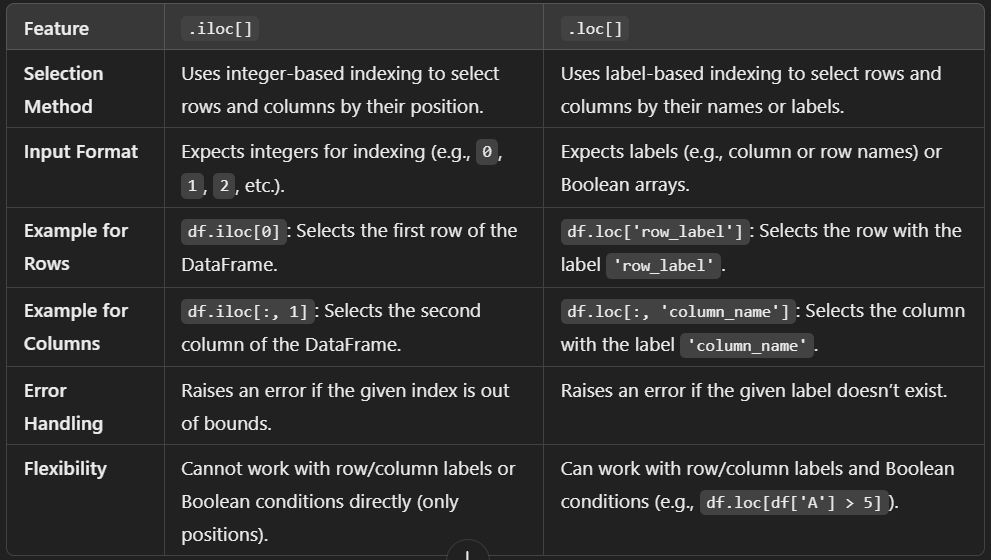

If you'd like to see more discussion on how loc and iloc are different, check out this great Stack Overflow post: http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation. Just remember that **iloc looks at position** and **loc looks at labels**. Loc becomes very important when your row labels aren't integers. 

# Sorting

Let's say that we want to sort the dataframe in increasing order for the scores of the losing team

In [27]:
df.sort_values('Lscore').head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
100027,2008,66,1203,49,1387,20,H,0
49310,1997,66,1157,61,1204,21,H,0
89021,2006,44,1284,41,1343,21,A,0
85042,2005,66,1131,73,1216,22,H,0
103660,2009,26,1326,59,1359,22,H,0


**Q**: Make three dataframes that are sorted by season, winning team, and winning score respectively. Then, Using iloc, select the rows from index 100 to 200 and the columns for season, winning team, and winning score, respectively. 

In [28]:
# Write your code here
df.sort_values('Season')
df.sort_values('Wteam')
df.sort_values('Wscore')

df.iloc[100:200 + 1][['Season', 'Wteam', 'Wscore']]

,Season,Wteam,Wscore
100,1985,1409,86
101,1985,1444,90
102,1985,1451,89
103,1985,1139,78
104,1985,1154,78
...,...,...,...
196,1985,1203,83
197,1985,1222,73
198,1985,1227,76
199,1985,1228,73


### Student's notes: 
#### Single pair of square brackets, [ ], versus double, [[ ]]:

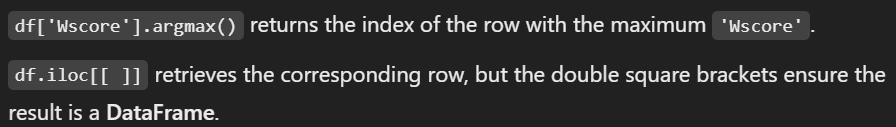
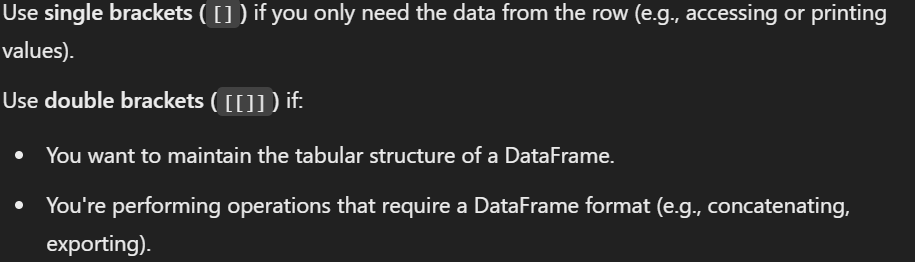

- - - 

### OBS: Notice also that we call the coloumn using quotation marks:  [ [ 'Wteam' ] ]

- - - 

**Q**: From these three subsets you obtained above, find the season and winning team for the game with the highest winning score.

In [29]:
# Write your code here

df.iloc[[df['Wscore'].argmax()]][['Season', 'Wteam']]


,Season,Wteam
24970,1991,1258


Alternative, using .loc:

In [30]:
# Condensed to a single line:

# With .loc to access the row and the desired columns
df.loc[df['Wscore'].idxmax(), ['Season', 'Wteam']]

Season    1991
Wteam     1258
Name: 24970, dtype: object

In [31]:
# One more, using a variable to make it more 'readable':

max_score_index = df['Wscore'].idxmax()

df.loc[max_score_index, ['Season', 'Wteam']]

Season    1991
Wteam     1258
Name: 24970, dtype: object

# Filtering Rows Conditionally

Now, let's say we want to find all of the rows that satisy a particular condition. For example, I want to find all of the games where the winning team scored more than 150 points. The idea behind this command is you want to access the column 'Wscore' of the dataframe df (df['Wscore']), find which entries are above 150 (df['Wscore'] > 150), and then returns only those specific rows in a dataframe format (df[df['Wscore'] > 150]).

In [32]:
df[df['Wscore'] > 150]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
5269,1986,75,1258,151,1109,107,H,0
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
16040,1989,40,1328,152,1331,122,H,0
16853,1989,68,1258,162,1109,144,A,0
17867,1989,92,1258,181,1109,150,H,0
19653,1990,30,1328,173,1109,101,H,0
19971,1990,38,1258,152,1109,137,A,0
20022,1990,40,1116,166,1109,101,H,0
22145,1990,97,1258,157,1362,115,H,0


This also works if you have multiple conditions. Let's say we want to find out when the winning team scores more than 150 points and when the losing team scores below 100. 

In [33]:
df[(df['Wscore'] > 150) & (df['Lscore'] < 100)]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
25656,1991,84,1106,151,1212,97,H,0
28687,1992,54,1261,159,1319,86,H,0
35023,1993,112,1380,155,1341,91,A,0
52600,1998,33,1395,153,1410,87,H,0


**Q**: Create a new column in the DataFrame called 'ScoreDifference' which is the absolute difference between the winning score and the losing score. Filter the DataFrame to only include games where the 'ScoreDifference' is greater than the average 'ScoreDifference' for all games.

In [34]:
# Write your code here

import builtins
abs = builtins.abs
# I accidentally used 'abs' as a variable, and I need to reset it to call back the function


# print(abs)
# type(abs)



# Defining 'ScoreDifference'
df['ScoreDifference'] = abs(df['Wscore'] - df['Lscore'])

# Calcualte the average difference value
mean_difference = df['ScoreDifference'].mean()
print(f"Average score difference (absolute value of 'Wscore' minus 'Lscore'): \n{round(mean_difference)}") # For reference to check that the df output is a larger value

df[df['ScoreDifference'] > mean_difference]

Average score difference (absolute value of 'Wscore' minus 'Lscore'): 
12


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,ScoreDifference
0,1985,20,1228,81,1328,64,N,0,17
3,1985,25,1165,70,1432,54,H,0,16
6,1985,25,1228,64,1226,44,N,0,20
8,1985,25,1260,98,1133,80,H,0,18
10,1985,25,1307,103,1288,71,H,0,32
...,...,...,...,...,...,...,...,...,...
145280,2016,131,1401,71,1261,38,N,0,33
145282,2016,131,1433,76,1172,54,N,0,22
145284,2016,132,1114,70,1419,50,N,0,20
145285,2016,132,1163,72,1272,58,N,0,14


**Q**: From this filtered DataFrame, find the season and teams involved in the game with the highest 'ScoreDifference'.

In [35]:
# Write your code here

score_difference_above_mean_df = df[df['ScoreDifference'] > mean_difference]

highest_score_difference_index = score_difference_above_mean_df['ScoreDifference'].idxmax()
print('Highest score difference:', df['ScoreDifference'].max())

df.loc[[highest_score_difference_index], ['Season', 'Wteam', 'Lteam']]

Highest score difference: 91


,Season,Wteam,Lteam
44653,1996,1409,1341


# Grouping

Another important function in Pandas is **groupby()**. This is a function that allows you to group entries by certain attributes (e.g Grouping entries by Wteam number) and then perform operations on them. The following function groups all the entries (games) with the same Wteam number and finds the mean for each group. 

In [36]:
df.groupby('Wteam')['Wscore'].mean().head()

Wteam
1101    78.111111
1102    69.893204
1103    75.839768
1104    75.825944
1105    74.960894
Name: Wscore, dtype: float64

This next command groups all the games with the same Wteam number and finds where how many times that specific team won at home, on the road, or at a neutral site

In [37]:
df.groupby('Wteam')['Wloc'].value_counts().head(9)

Wteam  Wloc
1101   H        12
       A         3
       N         3
1102   H       204
       A        73
       N        32
1103   H       324
       A       153
       N        41
Name: count, dtype: int64

Each dataframe has a **values** attribute which is useful because it basically displays your dataframe in a numpy array style format

In [38]:
df.values

array([[1985, 20, 1228, ..., 'N', 0, 17],
       [1985, 25, 1106, ..., 'H', 0, 7],
       [1985, 25, 1112, ..., 'H', 0, 7],
       ...,
       [2016, 132, 1246, ..., 'N', 1, 5],
       [2016, 132, 1277, ..., 'N', 0, 4],
       [2016, 132, 1386, ..., 'N', 0, 13]], dtype=object)

Now, you can simply just access elements like you would in an array. 

In [39]:
df.values[1][2]
# Note: [Row][Column]

1106

**Q**: Group the DataFrame by season and find the average winning score for each season.

In [40]:
# Write your code here
df.groupby('Season')['Wscore'].mean()

Season
1985    74.723040
1986    74.813640
1987    77.993870
1988    79.773704
1989    81.728511
1990    80.846477
1991    82.733932
1992    79.992004
1993    79.508790
1994    81.160345
1995    80.096149
1996    78.205483
1997    76.300842
1998    77.229902
1999    76.043581
2000    76.310467
2001    77.088650
2002    76.963557
2003    75.795061
2004    74.971122
2005    74.693690
2006    74.587555
2007    74.829467
2008    74.962425
2009    74.033721
2010    74.652480
2011    74.374190
2012    73.379973
2013    72.840789
2014    76.101268
2015    72.680799
2016    78.295958
Name: Wscore, dtype: float64

**Q**: Group the DataFrame by winning team and find the maximum winning score for each team across all seasons.

In [41]:
# Write your code here
df.groupby('Wteam')['Wscore'].max()

Wteam
1101     95
1102    111
1103    109
1104    114
1105    114
       ... 
1460    136
1461    112
1462    125
1463    105
1464    115
Name: Wscore, Length: 364, dtype: int64

**Q**: Group the DataFrame by both season and winning team. Find the team with the highest average winning score for each season.

In [42]:
# Write your code here

# Groups by 'Season' and 'Wteam', then calculate the avg. of 'Wscore'
avg_score_for_Wteams = df.groupby(['Season', 'Wteam'])['Wscore'].mean()

# Finds the team with the highest average winning score for each season
idx = avg_score_for_Wteams.groupby('Season').idxmax()

# New DataFrame with Saeson and Wteam with highest avg. winning score
pd.DataFrame(idx.tolist(), columns=['Season', 'Team'])

,Season,Team
0,1985,1328
1,1986,1109
2,1987,1380
3,1988,1258
4,1989,1258
5,1990,1258
6,1991,1380
7,1992,1380
8,1993,1380
9,1994,1380


**Q**: Create a new DataFrame that counts the number of wins for each team in each season. This will involve grouping by both season and winning team, and then using the count() function.

In [43]:
# Write your code here

df.groupby(['Season', 'Wteam'])['Wscore'].count()

Season  Wteam
1985    1102      5
        1103      9
        1104     21
        1106     10
        1108     19
                 ..
2016    1460     20
        1461     12
        1462     27
        1463     21
        1464      9
Name: Wscore, Length: 10172, dtype: int64

**Q**: For each season, find the team with the most wins. This will involve creating a DataFrame similar to the one in task 5, and then using the idxmax() function for each season.

In [44]:
# Write your code here

# Count the amount of wins for each team each season
win_counter = df.groupby(['Season', 'Wteam'])['Wscore'].count()

# Find index of the team with higest win count each season
win_counter.groupby('Season').idxmax()

# Make DataFrame which displays the most winning team each season
pd.DataFrame(idx.tolist(), columns=['Season', 'Team'])

,Season,Team
0,1985,1328
1,1986,1109
2,1987,1380
3,1988,1258
4,1989,1258
5,1990,1258
6,1991,1380
7,1992,1380
8,1993,1380
9,1994,1380


**Q**: Group the DataFrame by losing team and find the average losing score for each team across all seasons. Compare this with the average winning score for each team from task 3. Are there teams that have a higher average losing score than winning score?

In [45]:
# Write your code here

# Calculate the mean losing score for each team per season
losing_score_mean = df.groupby(['Season','Lteam'])['Lscore'].mean()

# Calculate the mean winning score for each team per season
winning_score_mean = df.groupby(['Season','Wteam'])['Wscore'].mean()




# If we also want to display when a team has had a higher losing mean than winning mean

import pandas as pd

# Calculate the mean of the losing score for each team per season
losing_score_mean = df.groupby(['Season', 'Lteam'])['Lscore'].mean().reset_index()
losing_score_mean.columns = ['Season', 'Team', 'LosingScoreMean']

# Calculate the mean of the winning score for each team per season
winning_score_mean = df.groupby(['Season', 'Wteam'])['Wscore'].mean().reset_index()
winning_score_mean.columns = ['Season', 'Team', 'WinningScoreMean']

# Merge the two DataFrames on 'Season' and 'Team'
merged_df = pd.merge(losing_score_mean, winning_score_mean, on=['Season', 'Team'], how='outer')

# Filter the teams where LosingScoreMean is greater than WinningScoreMean
filtered_df = merged_df[merged_df['LosingScoreMean'] > merged_df['WinningScoreMean']]

# Sort the DataFrame by 'Season'
filtered_df.sort_values(by='Season')

,Season,Team,LosingScoreMean,WinningScoreMean
29,1985,1140,75.428571,74.600000
157,1985,1306,58.681818,58.571429
171,1985,1325,67.857143,67.450000
183,1985,1337,76.428571,75.400000
229,1985,1399,70.250000,69.533333
...,...,...,...,...
8186,2011,1197,61.950000,60.500000
8718,2012,1394,58.625000,58.000000
9436,2014,1414,70.181818,68.619048
9232,2014,1206,69.500000,69.454545


# Dataframe Iteration

In order to iterate through dataframes, we can use the **iterrows()** function. Below is an example of what the first two rows look like. Each row in iterrows is a Series object

In [46]:
for index, row in df.iterrows():
    print(row)
    if index == 1:
        break

Season             1985
Daynum               20
Wteam              1228
Wscore               81
Lteam              1328
Lscore               64
Wloc                  N
Numot                 0
ScoreDifference      17
Name: 0, dtype: object
Season             1985
Daynum               25
Wteam              1106
Wscore               77
Lteam              1354
Lscore               70
Wloc                  H
Numot                 0
ScoreDifference       7
Name: 1, dtype: object


**Q**: Create a new column 'HighScoringGame' that is 'Yes' if the winning score is greater than 100 and 'No' otherwise. This will require iterating over the rows of the DataFrame and checking the value of the winning score for each row.

In [47]:
# Write your code here

df['HighScoringGame'] = 'No'

for index, row in df.iterrows():
    if row['Wscore'] >= 100:
        df.at[index, 'HighScoringGame'] = 'Yes'
    else:
        df.at[index, 'HighScoringGame'] = 'No'
df



# # Uncomment the code below for instances when HighScoringGame == 'Yes'
# df[df['HighScoringGame'] == 'Yes']



# # Uncomment the code below and change score_difference_variable: when increasing this value, the chances of HighScoringGame == 'Yes' increases
# score_difference_variable = 50
# df[df['ScoreDifference'] > score_difference_variable]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,ScoreDifference,HighScoringGame
0,1985,20,1228,81,1328,64,N,0,17,No
1,1985,25,1106,77,1354,70,H,0,7,No
2,1985,25,1112,63,1223,56,H,0,7,No
3,1985,25,1165,70,1432,54,H,0,16,No
4,1985,25,1192,86,1447,74,H,0,12,No
...,...,...,...,...,...,...,...,...,...,...
145284,2016,132,1114,70,1419,50,N,0,20,No
145285,2016,132,1163,72,1272,58,N,0,14,No
145286,2016,132,1246,82,1401,77,N,1,5,No
145287,2016,132,1277,66,1345,62,N,0,4,No


**Q**: Calculate the total number of games played by each team, whether they won or lost. This will require iterating over the rows of the DataFrame and updating a dictionary that keeps track of the number of games for each team.

In [48]:
# Write your code here
games_played = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Update the count for the winning team
    if row['Wteam'] in games_played:
        games_played[row['Wteam']] += 1
    else:
        games_played[row['Wteam']] = 1
    
    # Update the count for the losing team
    if row['Lteam'] in games_played:
        games_played[row['Lteam']] += 1
    else:
        games_played[row['Lteam']] = 1

games_played

{1228: 992,
 1328: 968,
 1106: 855,
 1354: 906,
 1112: 981,
 1223: 363,
 1165: 833,
 1432: 69,
 1192: 908,
 1447: 903,
 1218: 931,
 1337: 922,
 1226: 847,
 1242: 993,
 1268: 969,
 1260: 914,
 1133: 949,
 1305: 922,
 1424: 974,
 1307: 969,
 1288: 925,
 1344: 951,
 1438: 952,
 1374: 916,
 1411: 903,
 1412: 962,
 1397: 963,
 1417: 966,
 1225: 880,
 1116: 980,
 1368: 808,
 1120: 936,
 1391: 879,
 1135: 847,
 1306: 898,
 1143: 947,
 1388: 897,
 1153: 970,
 1184: 863,
 1159: 887,
 1171: 829,
 1216: 930,
 1173: 960,
 1134: 200,
 1177: 942,
 1296: 879,
 1193: 942,
 1265: 934,
 1196: 981,
 1416: 881,
 1206: 938,
 1137: 912,
 1210: 972,
 1149: 824,
 1211: 921,
 1102: 840,
 1234: 968,
 1114: 910,
 1332: 927,
 1243: 927,
 1317: 883,
 1257: 994,
 1231: 969,
 1277: 966,
 1145: 934,
 1278: 948,
 1453: 912,
 1286: 851,
 1186: 849,
 1301: 979,
 1144: 850,
 1325: 942,
 1384: 887,
 1326: 968,
 1248: 896,
 1287: 857,
 1339: 879,
 1334: 899,
 1365: 907,
 1375: 896,
 1126: 906,
 1403: 939,
 1152: 865,
 1423

**Q**: For each season, find the game with the highest score difference (winning score - losing score). This will require iterating over the rows of the DataFrame, keeping track of the highest score difference for each season, and updating it if a game with a higher score difference is found.

In [49]:
# Write your code here


highest_score_diff = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    season = row['Season']
    Wscore_Lscore_difference = row['Wscore'] - row['Lscore']
    
    # If the season is not in the dictionary or the current score difference is greater than the stored one
    if season not in highest_score_diff or Wscore_Lscore_difference > highest_score_diff[season]['ScoreDifference']:
        highest_score_diff[season] = {
            'Game': 1 + index, # For index 0 we want Game number 1
            'ScoreDifference': Wscore_Lscore_difference
        }

# Convert the dictionary to a DataFrame for better display
pd.DataFrame.from_dict(highest_score_diff, orient='index')


,Game,ScoreDifference
1985,237,60
1986,4732,84
1987,8241,73
1988,12047,68
1989,16678,70
1990,19503,76
1991,25162,68
1992,27998,82
1993,33859,81
1994,36405,69


Remember, iterating over a DataFrame should generally be avoided if a vectorized operation can be used instead, as vectorized operations are usually much faster. However, these tasks are designed to give practice with DataFrame iteration for cases where it might be necessary.

Vectorized Operation Example: Create a new column 'HighScoringGame' in the DataFrame using a vectorized operation. This column should contain 'Yes' if the winning score is greater than 100 and 'No' otherwise. Use the np.where function from the numpy library for this task.

In [50]:
import numpy as np
df['HighScoringGame'] = np.where(df['Wscore'] > 100, 'Yes', 'No')

df

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,ScoreDifference,HighScoringGame
0,1985,20,1228,81,1328,64,N,0,17,No
1,1985,25,1106,77,1354,70,H,0,7,No
2,1985,25,1112,63,1223,56,H,0,7,No
3,1985,25,1165,70,1432,54,H,0,16,No
4,1985,25,1192,86,1447,74,H,0,12,No
...,...,...,...,...,...,...,...,...,...,...
145284,2016,132,1114,70,1419,50,N,0,20,No
145285,2016,132,1163,72,1272,58,N,0,14,No
145286,2016,132,1246,82,1401,77,N,1,5,No
145287,2016,132,1277,66,1345,62,N,0,4,No


**Q**: Vectorized Operation: Calculate the total number of games played by each team, whether they won or lost. Instead of iterating over the DataFrame, use the value_counts() function on the winning team and losing team columns separately, and then add the two Series together.

In [51]:
# Write your code here

# Seperate counts for total wins and losses
wins = df['Wteam'].value_counts()
losses = df['Lteam'].value_counts()

# The sum of wins and losses
total_games = wins.add(losses, fill_value=0)

total_games

1101     76
1102    840
1103    910
1104    975
1105    447
       ... 
1460    827
1461    914
1462    954
1463    838
1464    856
Name: count, Length: 364, dtype: int64

**Q**: For each season, find the game with the highest score difference (winning score - losing score). Instead of iterating over the DataFrame, create a new column 'ScoreDifference' using vectorized subtraction, then use the groupby() function and idxmax() function to find the game with the highest score difference for each season.

In [52]:
# Write your code here

df['ScoreDifference'] = df['Wscore'] - df['Lscore']

idx = df.groupby('Season')['ScoreDifference'].idxmax()

# Extract the rows with the highest score difference for each season
df.loc[idx]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,ScoreDifference,HighScoringGame
236,1985,33,1361,128,1288,68,H,0,60,Yes
4731,1986,60,1314,129,1264,45,N,0,84,Yes
8240,1987,51,1155,112,1118,39,H,0,73,Yes
12046,1988,40,1328,152,1147,84,H,0,68,Yes
16677,1989,64,1242,115,1135,45,H,0,70,Yes
19502,1990,26,1181,130,1217,54,H,0,76,Yes
25161,1991,73,1163,115,1148,47,H,0,68,Yes
27997,1992,30,1116,128,1126,46,H,0,82,Yes
33858,1993,86,1328,146,1197,65,H,0,81,Yes
36404,1994,47,1228,121,1152,52,H,0,69,Yes


# Extracting Rows and Columns

The bracket indexing operator is one way to extract certain columns from a dataframe.

In [53]:
df[['Wscore', 'Lscore']].head()

,Wscore,Lscore
0,81,64
1,77,70
2,63,56
3,70,54
4,86,74


Notice that you can acheive the same result by using the loc function. Loc is a veryyyy versatile function that can help you in a lot of accessing and extracting tasks. 

In [54]:
df.loc[:, ['Wscore', 'Lscore']].head()

,Wscore,Lscore
0,81,64
1,77,70
2,63,56
3,70,54
4,86,74


Note the difference is the return types when you use brackets and when you use double brackets. 

In [55]:
type(df['Wscore'])

pandas.core.series.Series

In [56]:
type(df[['Wscore']])

pandas.core.frame.DataFrame

You've seen before that you can access columns through df['col name']. You can access rows by using slicing operations. 

In [57]:
df[0:3]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,ScoreDifference,HighScoringGame
0,1985,20,1228,81,1328,64,N,0,17,No
1,1985,25,1106,77,1354,70,H,0,7,No
2,1985,25,1112,63,1223,56,H,0,7,No


Here's an equivalent using iloc

In [58]:
df.iloc[0:3,:]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,ScoreDifference,HighScoringGame
0,1985,20,1228,81,1328,64,N,0,17,No
1,1985,25,1106,77,1354,70,H,0,7,No
2,1985,25,1112,63,1223,56,H,0,7,No


# Data Cleaning

One of the big jobs of doing well in Kaggle competitions is that of data cleaning. A lot of times, the CSV file you're given (especially like in the Titanic dataset), you'll have a lot of missing values in the dataset, which you have to identify. The following **isnull** function will figure out if there are any missing values in the dataframe, and will then sum up the total for each column. In this case, we have a pretty clean dataset.

In [59]:
df.isnull().sum()

Season             0
Daynum             0
Wteam              0
Wscore             0
Lteam              0
Lscore             0
Wloc               0
Numot              0
ScoreDifference    0
HighScoringGame    0
dtype: int64

If you do end up having missing values in your datasets, be sure to get familiar with these two functions. 
* **dropna()** - This function allows you to drop all(or some) of the rows that have missing values. 
* **fillna()** - This function allows you replace the rows that have missing values with the value that you pass in.

# Other Useful Functions

* **drop()** - This function removes the column or row that you pass in (You also have the specify the axis). 
* **agg()** - The aggregate function lets you compute summary statistics about each group
* **apply()** - Lets you apply a specific function to any/all elements in a Dataframe or Series
* **get_dummies()** - Helpful for turning categorical data into one hot vectors.
* **drop_duplicates()** - Lets you remove identical rows

# Lots of Other Great Resources

Pandas has been around for a while and there are a lot of other good resources if you're still interested on getting the most out of this library. 
* http://pandas.pydata.org/pandas-docs/stable/10min.html
* https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
* http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
* https://www.dataquest.io/blog/pandas-python-tutorial/
* https://drive.google.com/file/d/0ByIrJAE4KMTtTUtiVExiUGVkRkE/view
* https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y